In [21]:
import pandas as pd

df_sell_date_column = pd.read_csv("df_sell_date_column.csv")
df_sell_date_column = df_sell_date_column.drop(['Unnamed: 0'], axis = 1)
df = pd.read_csv("df_sell_final.csv")

In [2]:
import matplotlib.pyplot as plt


In [3]:
df_sell_date_column

,id,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-05,2011-02-06,...,2016-05-13,2016-05-14,2016-05-15,2016-05-16,2016-05-17,2016-05-18,2016-05-19,2016-05-20,2016-05-21,2016-05-22
0,FOODS_1_001_CA_1_evaluation,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4.48,8.96,0.00,0.00,0.00,0.00,6.72,6.72,0.00,2.24
1,FOODS_1_001_CA_2_evaluation,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,2.24,4.48,2.24,2.24,0.00,0.00,0.00,0.00,0.00
2,FOODS_1_001_CA_3_evaluation,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.24,0.00,4.48,0.00,0.00,0.00,4.48,6.72,0.00,2.24
3,FOODS_1_001_CA_4_evaluation,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.24,2.24,0.00,8.96,0.00,2.24,6.72,0.00,4.48,13.44
4,FOODS_1_001_TX_1_evaluation,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,4.48,2.24,0.00,0.00,4.48,2.24,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,HOUSEHOLD_2_516_TX_2_evaluation,0.0,0.00,11.88,11.88,0.00,17.82,5.94,23.76,5.94,...,5.94,0.00,17.82,0.00,5.94,5.94,0.00,0.00,5.94,5.94
30486,HOUSEHOLD_2_516_TX_3_evaluation,0.0,0.00,0.00,0.00,0.00,29.70,0.00,5.94,5.94,...,0.00,0.00,0.00,0.00,0.00,0.00,5.94,0.00,5.94,0.00
30487,HOUSEHOLD_2_516_WI_1_evaluation,0.0,35.64,0.00,11.88,11.88,23.76,5.94,47.52,29.70,...,0.00,0.00,5.94,11.88,0.00,5.94,0.00,5.94,0.00,11.88
30488,HOUSEHOLD_2_516_WI_2_evaluation,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,5.94,5.94,5.94,23.76,35.64,0.00,5.94,5.94,5.94,0.00


In [4]:
data_melt = df_sell_date_column.melt(id_vars='id', var_name='Date', value_name='Daily_total_sales')

In [5]:
data_melt_and_ids = data_melt.merge(df_evaluation[['id','item_id', 'dept_id','cat_id','store_id','state_id']], on = 'id')

In [6]:
data_melt_and_ids

,id,Date,Daily_total_sales,item_id,dept_id,cat_id,store_id,state_id
0,FOODS_1_001_CA_1_evaluation,2011-01-29,0.00,FOODS_1_001,FOODS_1,FOODS,CA_1,CA
1,FOODS_1_001_CA_1_evaluation,2011-01-30,0.00,FOODS_1_001,FOODS_1,FOODS,CA_1,CA
2,FOODS_1_001_CA_1_evaluation,2011-01-31,0.00,FOODS_1_001,FOODS_1,FOODS,CA_1,CA
3,FOODS_1_001_CA_1_evaluation,2011-02-01,0.00,FOODS_1_001,FOODS_1,FOODS,CA_1,CA
4,FOODS_1_001_CA_1_evaluation,2011-02-02,0.00,FOODS_1_001,FOODS_1,FOODS,CA_1,CA
...,...,...,...,...,...,...,...,...
59181085,HOUSEHOLD_2_516_WI_3_evaluation,2016-05-18,0.00,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,WI_3,WI
59181086,HOUSEHOLD_2_516_WI_3_evaluation,2016-05-19,11.88,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,WI_3,WI
59181087,HOUSEHOLD_2_516_WI_3_evaluation,2016-05-20,11.88,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,WI_3,WI
59181088,HOUSEHOLD_2_516_WI_3_evaluation,2016-05-21,29.70,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,WI_3,WI


In [7]:
data_melt_and_ids['Date'] = pd.to_datetime(data_melt_and_ids['Date'])


In [8]:
data_melt_and_ids['dept_id'].unique()

array(['FOODS_1', 'FOODS_2', 'FOODS_3', 'HOBBIES_1', 'HOBBIES_2',
       'HOUSEHOLD_1', 'HOUSEHOLD_2'], dtype=object)

In [17]:
import seaborn as sns

data_CA = data_melt_and_ids.loc[data_melt_and_ids['state_id'] == 'CA']
data_TX = data_melt_and_ids.loc[data_melt_and_ids['state_id'] == 'TX']
data_WI = data_melt_and_ids.loc[data_melt_and_ids['state_id'] == 'WI']
data_Overall_State = data_melt_and_ids.groupby(['Date','state_id'])['Daily_total_sales'].sum().unstack()
data_Overall_Store = data_melt_and_ids.groupby(['Date','store_id'])['Daily_total_sales'].sum().unstack()


In [10]:
total_sales_by_store_CA = data_CA.groupby(['Date','store_id'])['Daily_total_sales'].sum().unstack()
total_sales_by_store_TX = data_TX.groupby(['Date','store_id'])['Daily_total_sales'].sum().unstack()
total_sales_by_store_WI = data_WI.groupby(['Date','store_id'])['Daily_total_sales'].sum().unstack()

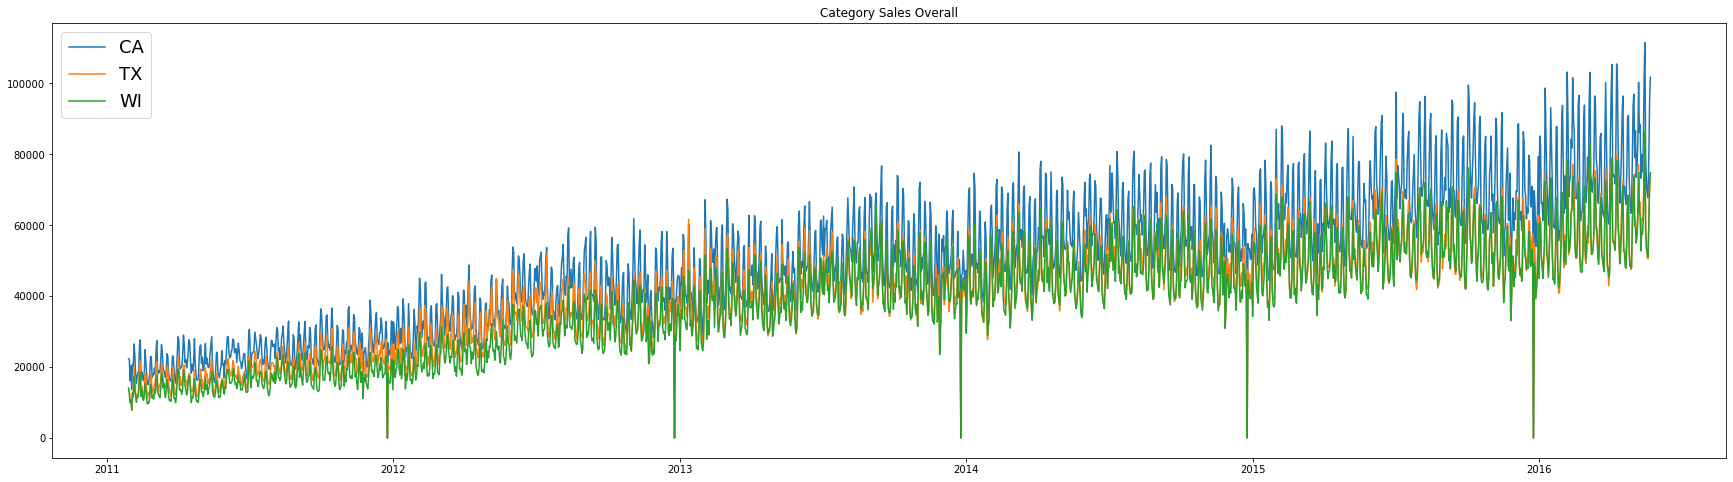

In [11]:
data_melt_and_ids.groupby(['Date','state_id'])['Daily_total_sales'].sum().unstack()

plt.figure(figsize=(30, 8))
plt.plot(data_Overall_State)
plt.legend(data_melt_and_ids['state_id'].unique(), prop ={'size':18})
plt.title("Category Sales Overall")
plt.show()

The daily items being sold per state seeems highest at the stores located in CA, however, the data may be only high due to CA having 1 extra store is included in the data.

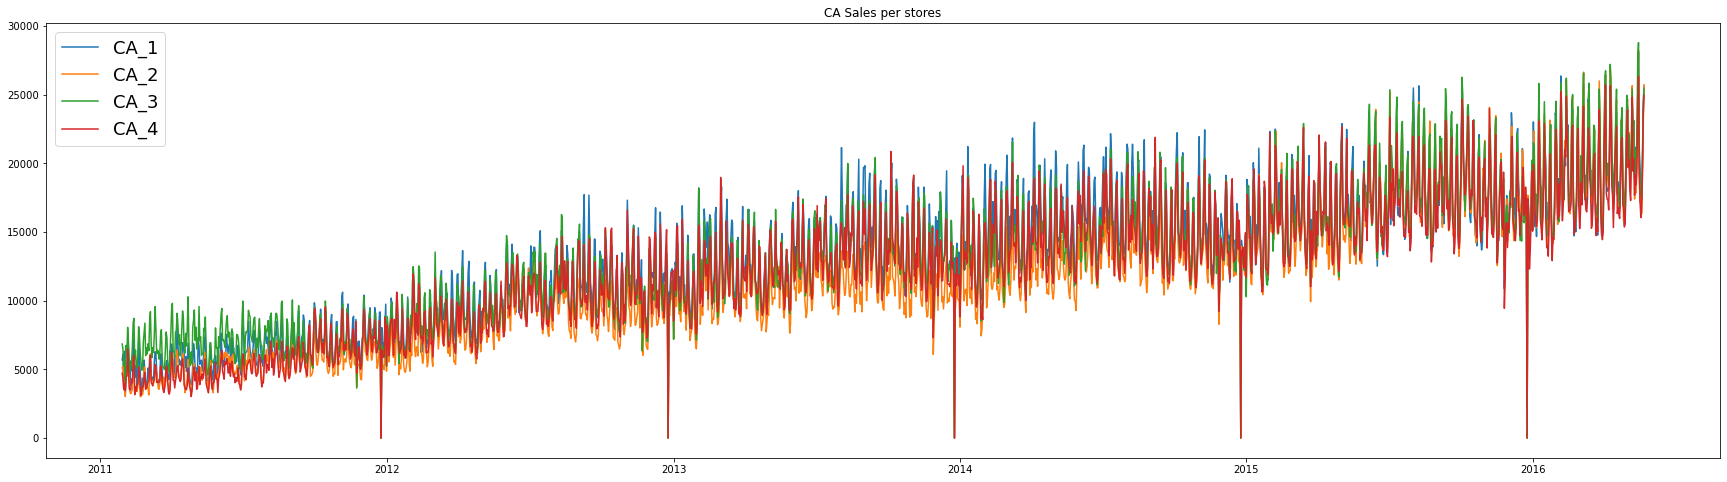

In [12]:
plt.figure(figsize=(30, 8))
plt.plot(total_sales_by_store_CA)
plt.legend(data_CA['store_id'].unique(), prop ={'size':18})
plt.title("CA Sales per stores")
plt.show()

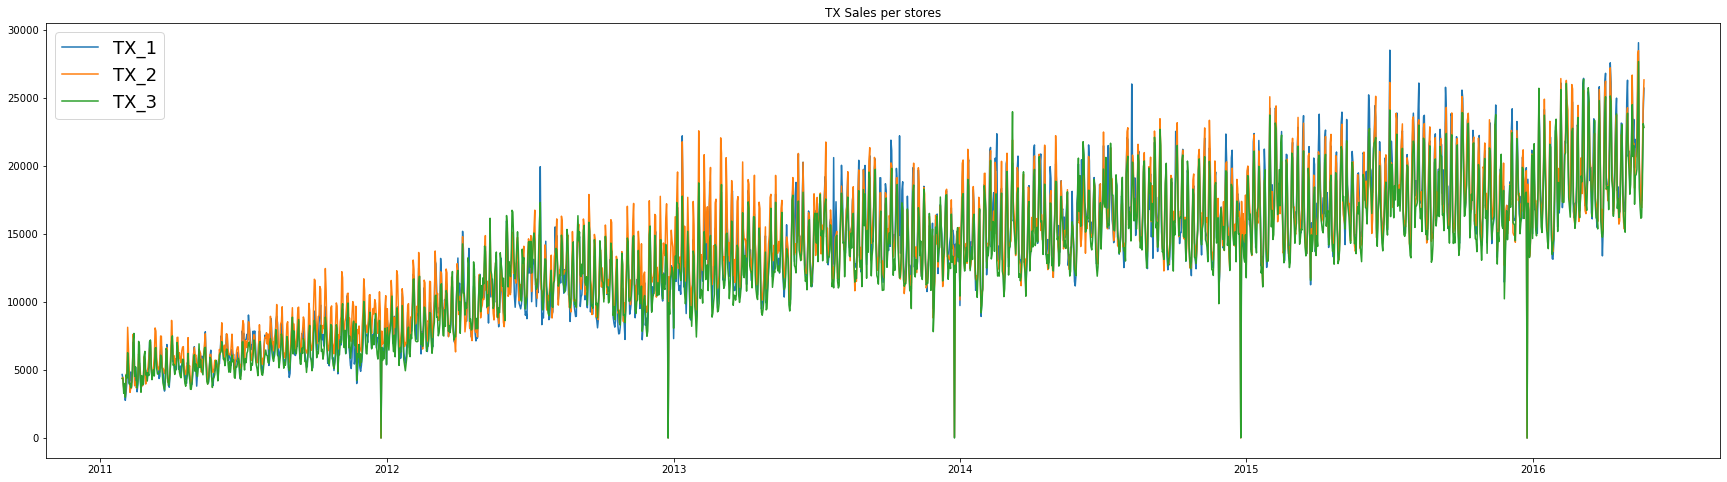

In [13]:
plt.figure(figsize=(30, 8))
plt.plot(total_sales_by_store_TX)
plt.legend(data_TX['store_id'].unique(), prop ={'size':18})
plt.title("TX Sales per stores")
plt.show()

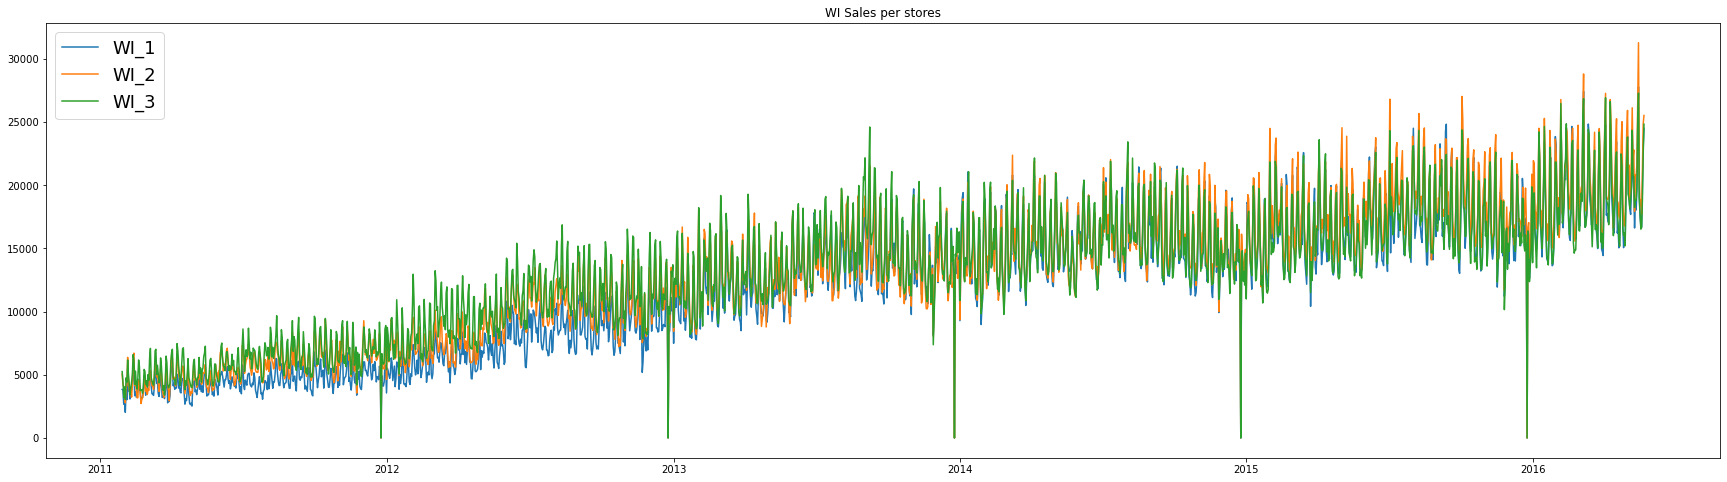

In [14]:
plt.figure(figsize=(30, 8))
plt.plot(total_sales_by_store_WI)
plt.legend(data_WI['store_id'].unique(), prop ={'size':18})
plt.title("WI Sales per stores")
plt.show()

In [15]:
total_sales_by_store_category = data_melt_and_ids.groupby(['Date','cat_id'])['Daily_total_sales'].sum().unstack()

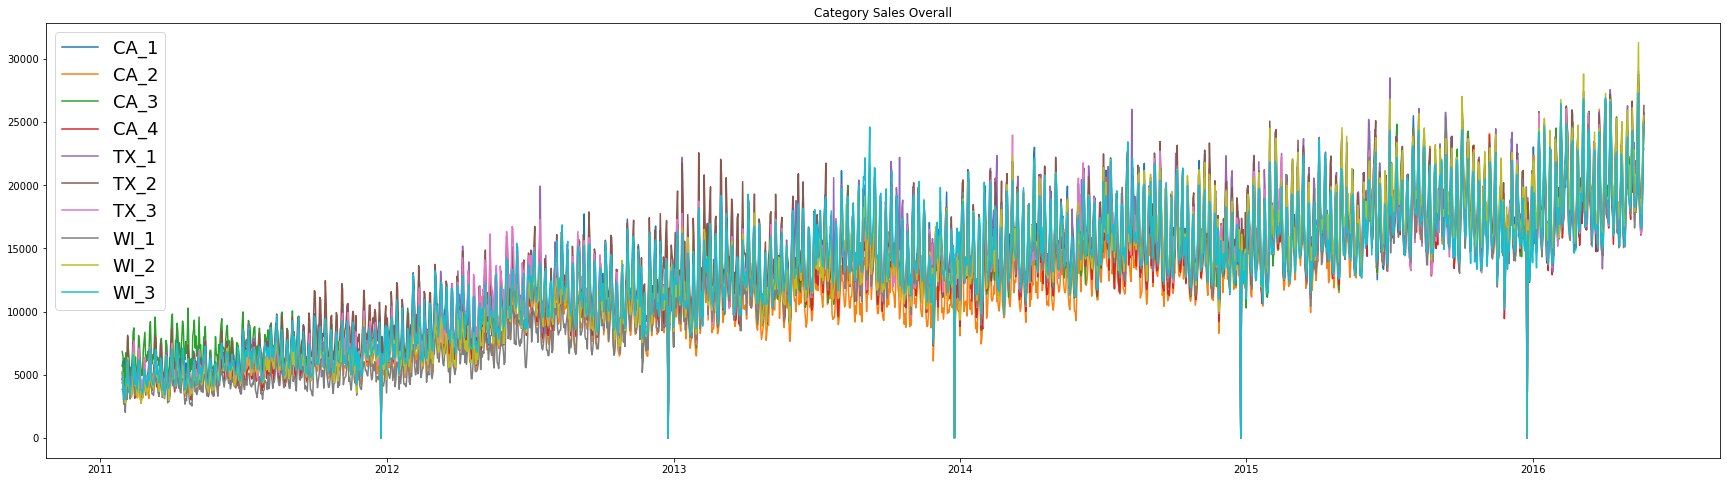

In [20]:
plt.figure(figsize=(30, 8))
plt.plot(data_Overall_Store)
plt.legend(data_melt_and_ids['store_id'].unique(), prop ={'size':18})
plt.title("Category Sales Overall")
plt.show()

The daily items being sold per store seems to have very simialr pattern across all the stores.

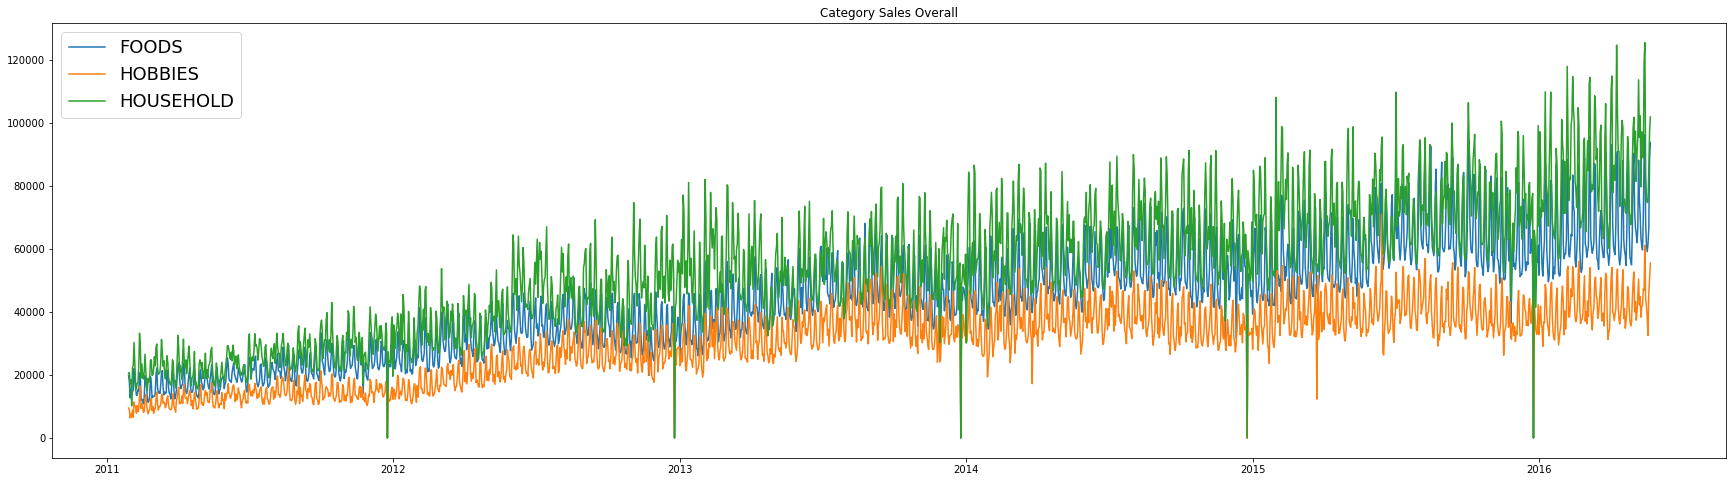

In [16]:
plt.figure(figsize=(30, 8))
plt.plot(total_sales_by_store_category)
plt.legend(data_melt_and_ids['cat_id'].unique(), prop ={'size':18})
plt.title("Category Sales Overall")
plt.show()

In [29]:
event1_date = df[['date',"event_type_1"]].loc[(df["event_type_1"] != "No_Event")]
event2_date = df[['date',"event_type_2"]].loc[(df["event_type_2"] != "No_Event")]

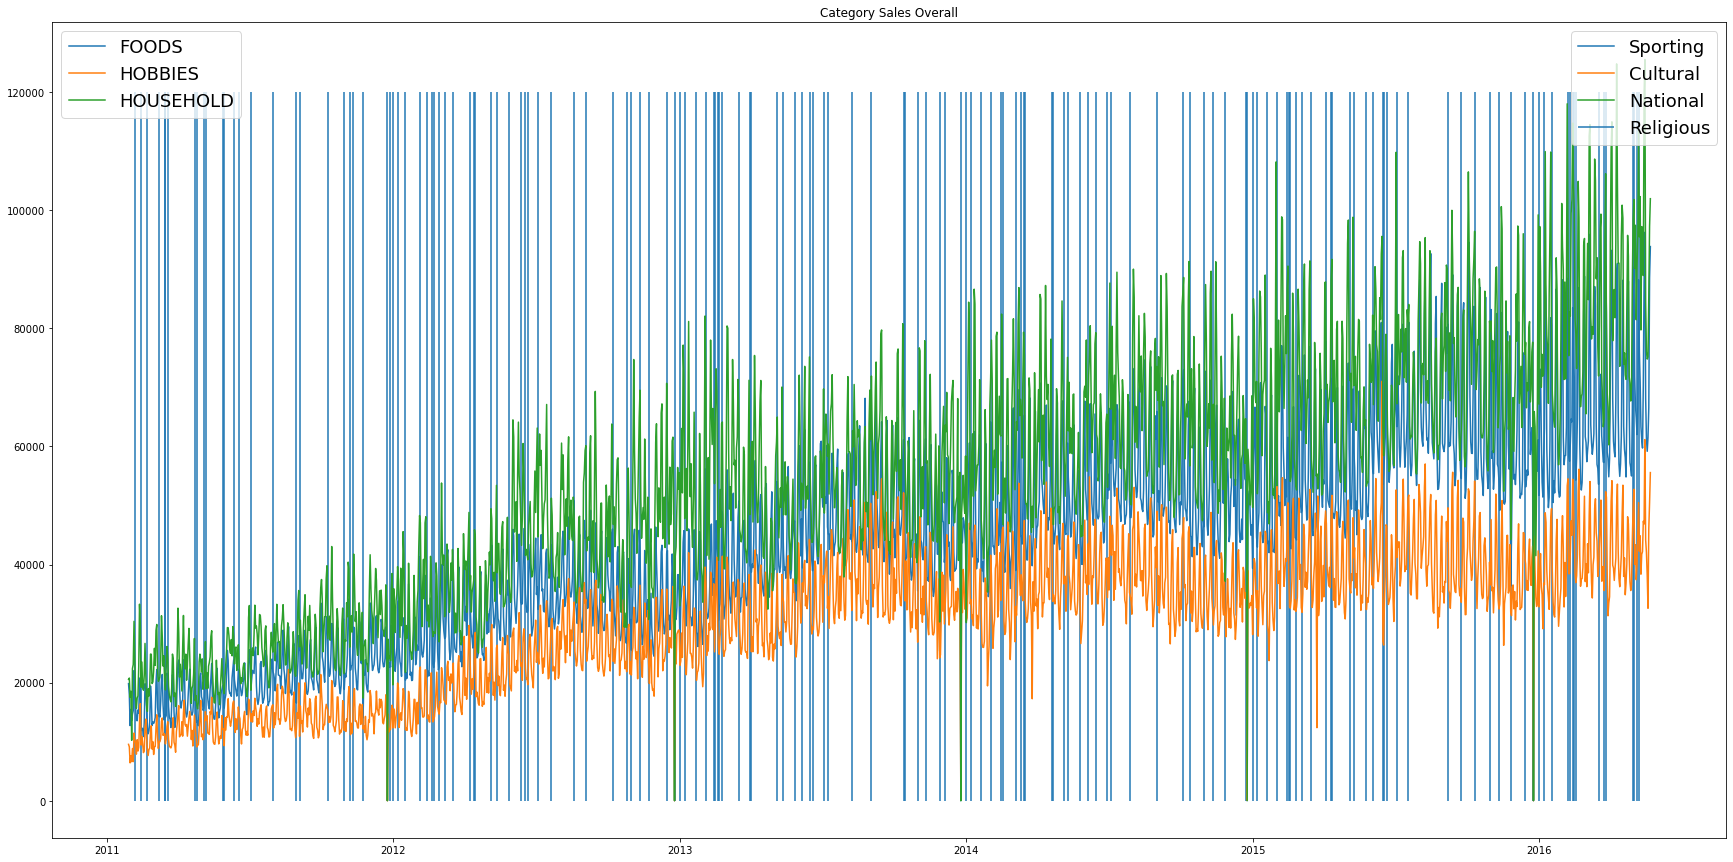

In [47]:
plt.figure(figsize=(30, 15))
plt.plot(total_sales_by_store_category)

plt.title("Category Sales Overall")
legend1 = plt.legend(data_melt_and_ids['cat_id'].unique(), prop ={'size':18}, loc = 'upper left')

plt.vlines(x = event1_date['date'], ymin=0, ymax=120000, label = event1_date['event_type_1'].unique())
plt.legend(event1_date['event_type_1'].unique(), prop ={'size':18}, loc = 'upper right')
plt.gca().add_artist(legend1)
plt.show()

In [59]:
event1_date['date'] = pd.to_datetime(event1_date['date'])
event1_date_2015 = event1_date.loc[event1_date['date'] >= '2015/01/01']
total_sales_by_store_category_2015 = data_melt_and_ids.loc[data_melt_and_ids['Date'] >='2015/01/01'].groupby(['Date','cat_id'])['Daily_total_sales'].sum().unstack()

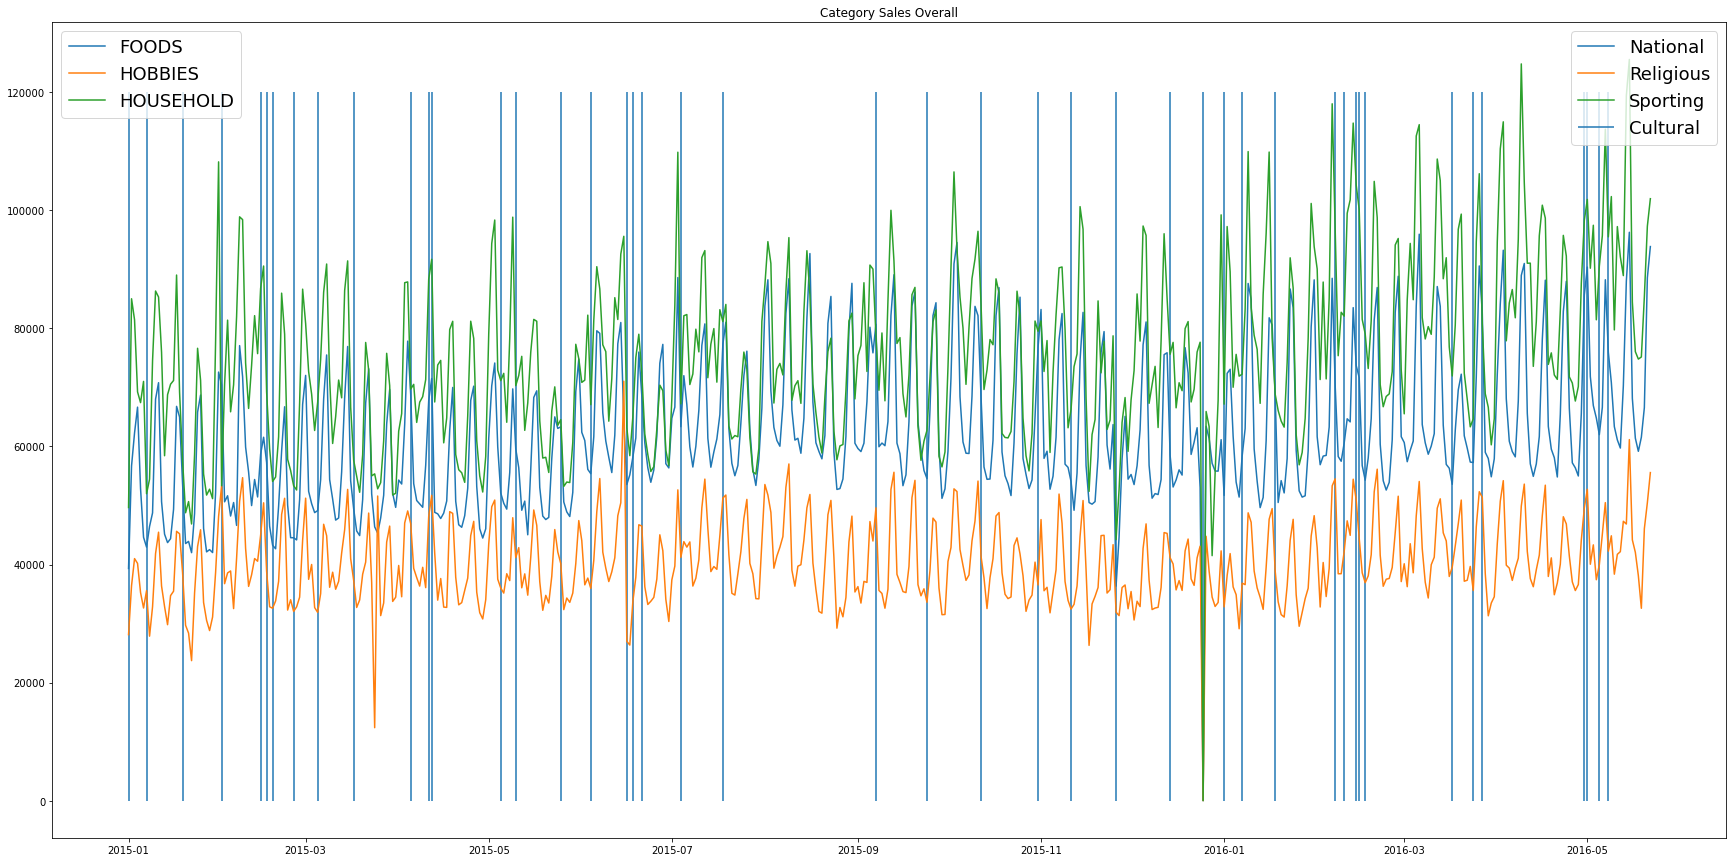

In [60]:
plt.figure(figsize=(30, 15))
plt.plot(total_sales_by_store_category_2015)

plt.title("Category Sales Overall")
legend1 = plt.legend(data_melt_and_ids['cat_id'].unique(), prop ={'size':18}, loc = 'upper left')

plt.vlines(x = event1_date_2015['date'], ymin=0, ymax=120000, label = event1_date['event_type_1'].unique())
plt.legend(event1_date_2015['event_type_1'].unique(), prop ={'size':18}, loc = 'upper right')
plt.gca().add_artist(legend1)
plt.show()

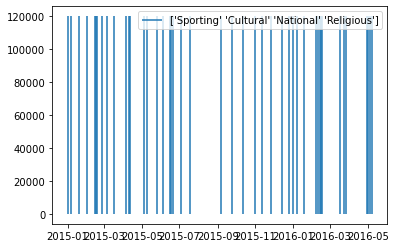

In [65]:
plt.vlines(x = event1_date_2015['date'], ymin=0, ymax=120000, label = event1_date['event_type_1'].unique())
plt.legend(event1_date_2015['event_type_1'].unique(), prop ={'size':18}, loc = 'upper right')
plt.show()

array(['National', 'Religious', 'Sporting', 'Cultural'], dtype=object)